<font size=6><b> Lec03. 딥러닝 기초(이미지)

* ref : https://www.tensorflow.org/?hl=ko
* ref : https://keras.io/ko/
* ref : https://keras.io/api/layers/core_layers/dense/

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import tensorflow as tf
tf.random.set_seed(1234)
np.random.seed(1234)

# Data Load

In [3]:
from keras.datasets import fashion_mnist

In [4]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# EDA
* imshow : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

<pre>
* <font color=blue>Z = 픽셀값을 갖는 행렬
  plt.imshow(Z)
  plt.show()

## fashion_mnist 
* ref :  https://www.tensorflow.org/tutorials/keras/classification?hl=ko

<table>
  <tbody><tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</tbody></table>

In [5]:
LABEL_NAME__ = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

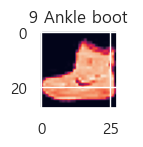

In [6]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[:1][0])
plt.title(f" {y_train[0]} {LABEL_NAME__[y_train[0]]} ")
plt.show()

## target 분포도

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64


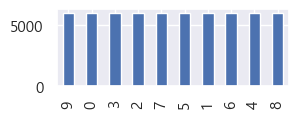

In [7]:
print( pd.Series(y_train).value_counts() )
plt.figure(figsize=(3,1))
pd.Series(y_train).value_counts().plot(kind='bar')
plt.show()

## fashion_mnist : 품목N 이미지

In [9]:
s = pd.Series(y_train)
idx_list = []
for N in range(10) :
    idx_list.extend( s[s.values==N].index[:10] )
print( len(idx_list) , idx_list )

100 [1, 2, 4, 10, 17, 26, 34, 48, 61, 64, 16, 21, 38, 69, 71, 74, 78, 80, 86, 97, 5, 7, 27, 37, 45, 53, 54, 65, 92, 123, 3, 20, 25, 31, 47, 49, 50, 51, 58, 59, 19, 22, 24, 28, 29, 68, 75, 76, 96, 117, 8, 9, 12, 13, 30, 36, 43, 60, 62, 63, 18, 32, 33, 39, 40, 55, 56, 72, 77, 95, 6, 14, 41, 46, 52, 83, 85, 87, 108, 119, 23, 35, 57, 99, 100, 105, 109, 110, 130, 144, 0, 11, 15, 42, 44, 79, 84, 88, 89, 90]


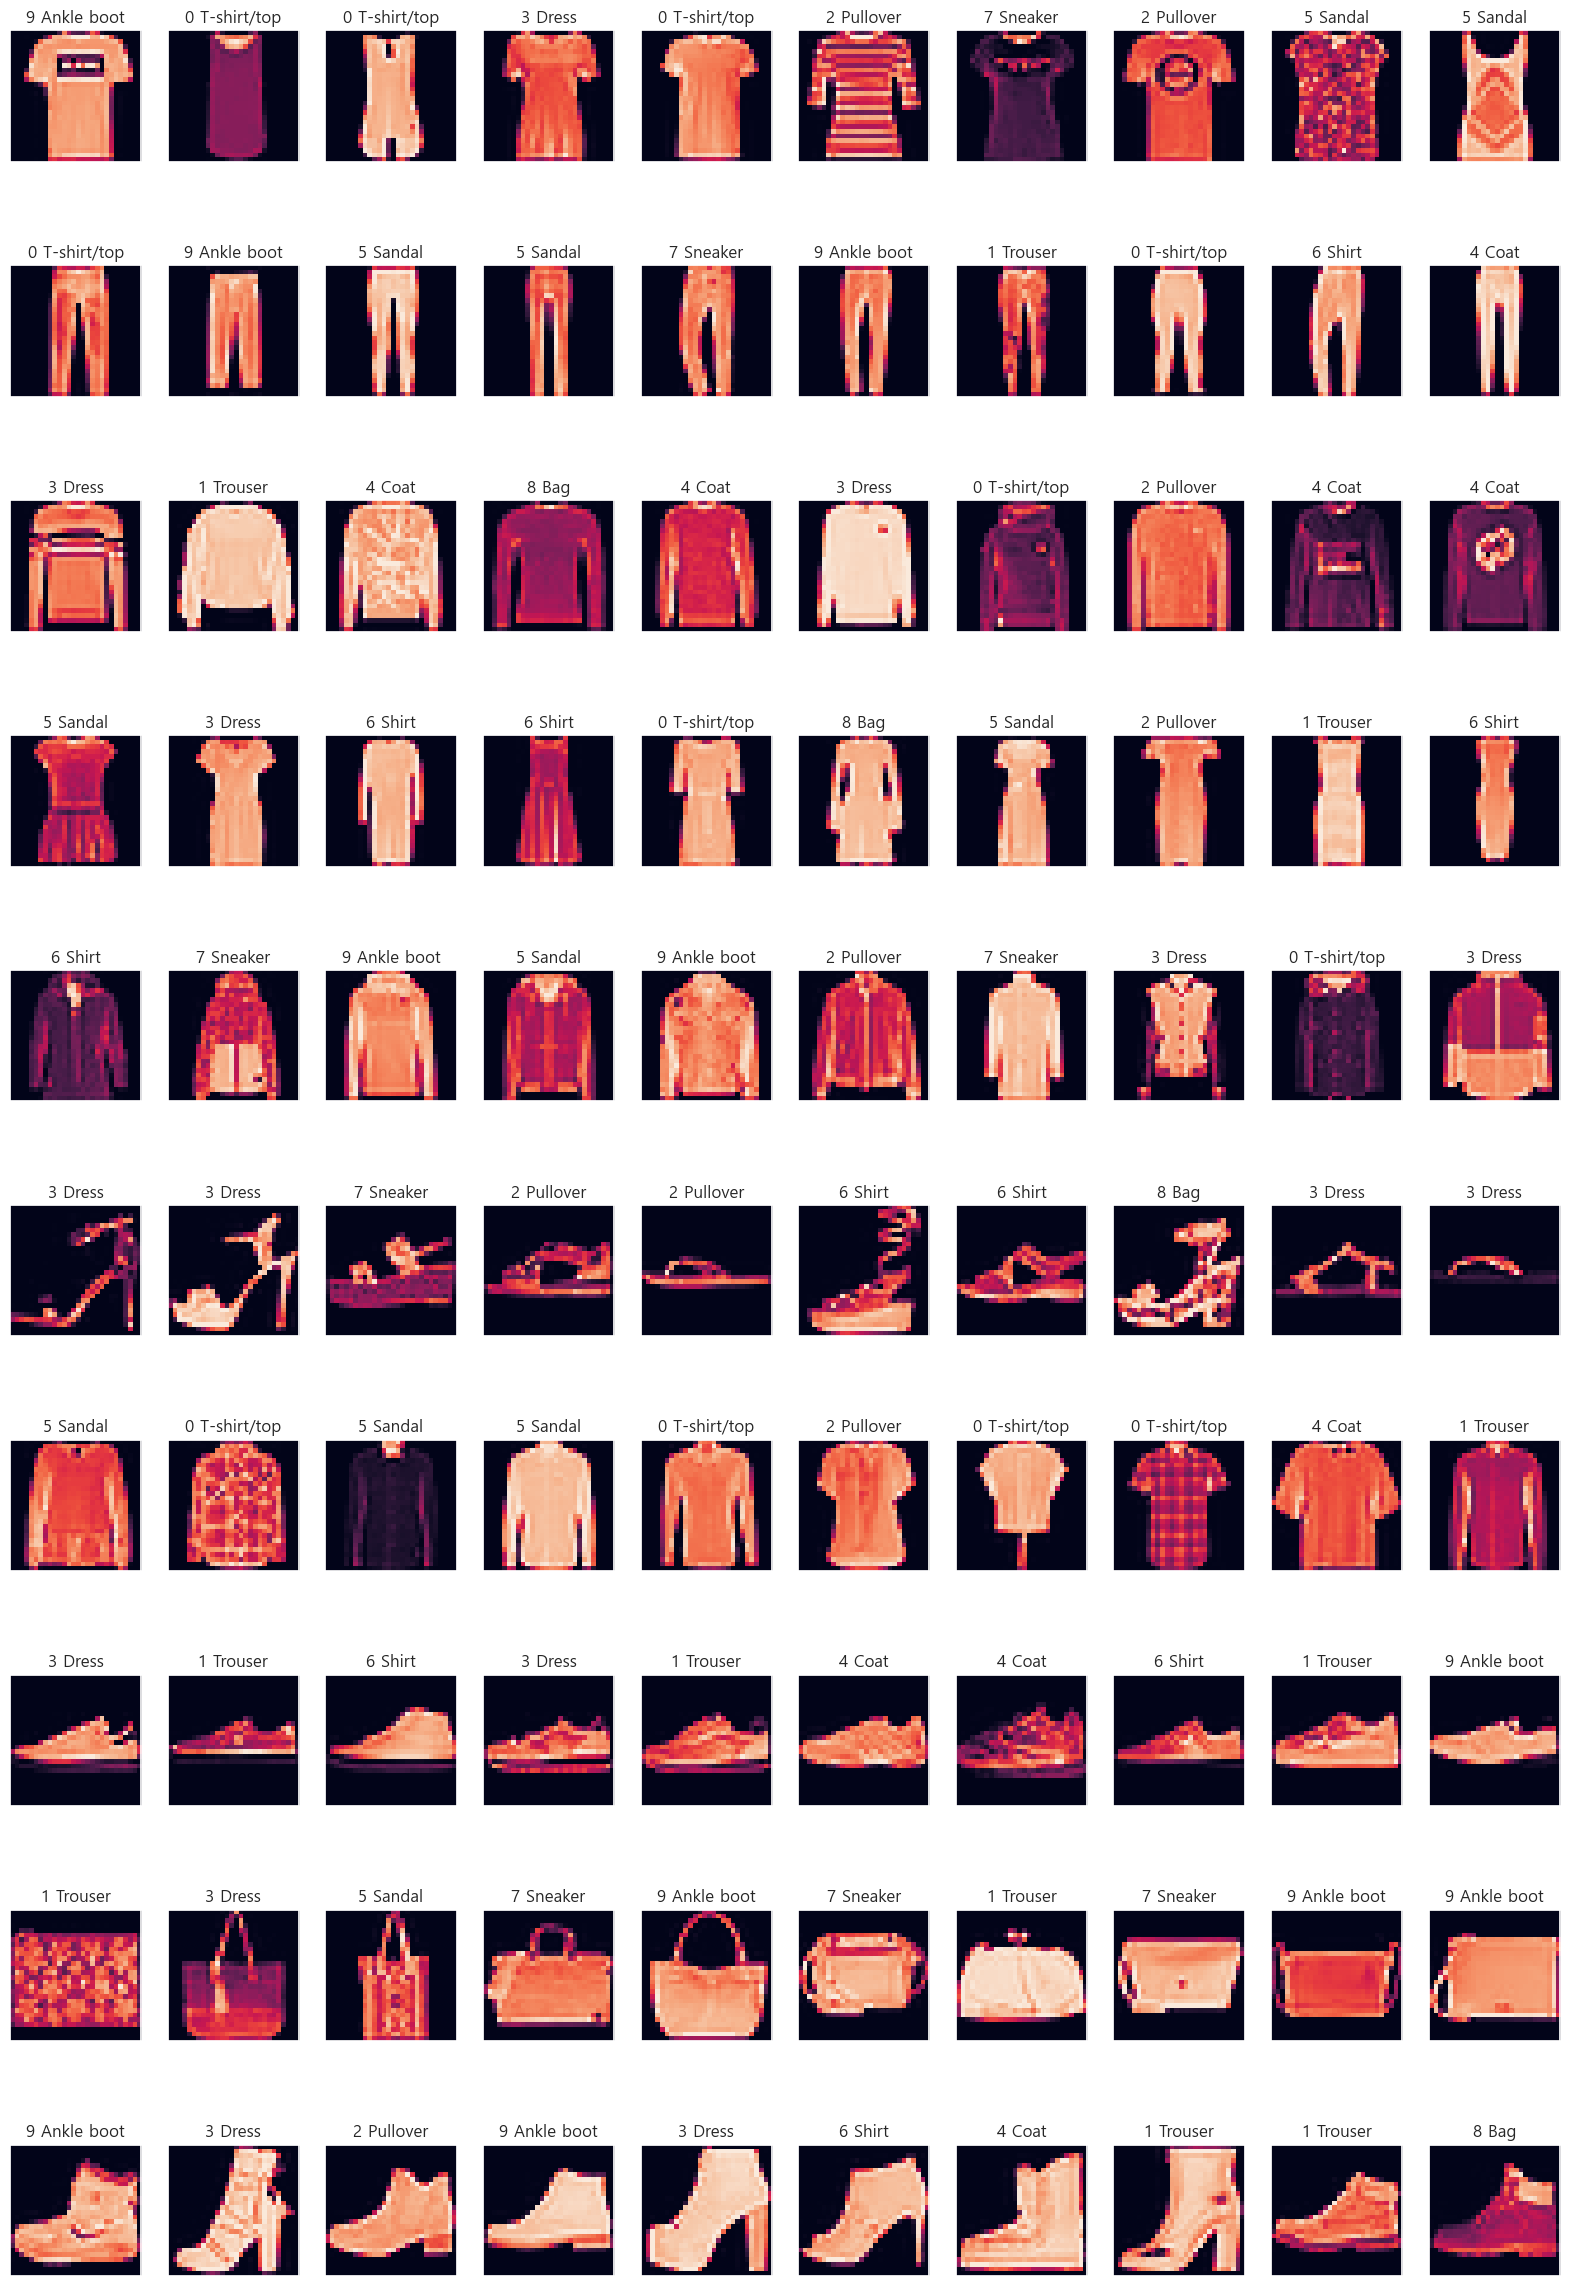

In [10]:
fig, axes = plt.subplots(10,10, figsize=(20,30))
# for i, px_arr in enumerate(X_train[100:130]) :     
for i, px_arr in enumerate(X_train[idx_list]) :
    row = i // 10
    col = i % 10
    axes[row][col].imshow(px_arr)
    axes[row][col].set_title( f"{y_train[i]} {LABEL_NAME__[y_train[i]]}" )
    
    # Hide axes,grid
    axes[row][col].grid(False)
    axes[row][col].set_xticks([])
    axes[row][col].set_yticks([])
plt.show()


# 전처리 & 가공

## Flatten
* 이미지 픽셀 (28*28) : 행렬(2D) --> arr(1D)

In [11]:
X_train.shape 

(60000, 28, 28)

In [12]:
X_train.reshape(60000, -1).shape

(60000, 784)

In [13]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

## 정규화(픽셀값 스케일링)
* 0 ~ 255 픽셀값을 0 ~1 값으로 변경
* MinMaxScaler()

In [14]:
X_train_scaler = X_train / 255.0
X_test_scaler  = X_test / 255.0

## traget 더미화 
* sklearn : OneHotEncoder(), pd.get_dummies()
* keras : utils.to_categorical()
* 0 ~ 9 숫자 : 원핫인코딩 
    * 0 : 1000000000
    * 1 : 0100000000 

In [15]:
from keras.utils import to_categorical
y_train_oh = to_categorical(y_train, num_classes=10, dtype='int')
y_test_oh  = to_categorical(y_test , num_classes=10, dtype='int')

print(y_train[:5])
print(y_train_oh[:5])

[9 0 0 3 0]
[[0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


# 모델 (Neural Network, FC)

## 모델&학습

In [16]:
from keras.layers import Dense
from keras import Sequential
from keras.initializers import GlorotNormal  #Xavier

In [17]:
model = Sequential()
model.add(Dense(units=300, input_dim=28*28, activation='relu', kernel_initializer='glorot_normal')) #입력층
model.add(Dense(units=100,  activation='relu'))              #히든레이어
model.add(Dense(units=60,  activation='relu'))              #히든레이어
model.add(Dense(units=10,  activation='softmax'))           #3종 출력층
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [18]:
fit_hisroty = model.fit(X_train_scaler, y_train_oh
                        , batch_size = 128
                        , validation_split=0.2, epochs=10)
print(fit_hisroty)
print ( model.evaluate(X_test_scaler, y_test_oh)  )

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.5536 - accuracy: 0.8040 - val_loss: 0.4201 - val_accuracy: 0.8450
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3830 - accuracy: 0.8621 - val_loss: 0.3961 - val_accuracy: 0.8550
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3402 - accuracy: 0.8760 - val_loss: 0.3570 - val_accuracy: 0.8658
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3145 - accuracy: 0.8850 - val_loss: 0.3679 - val_accuracy: 0.8695
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2952 - accuracy: 0.8907 - val_loss: 0.3229 - val_accuracy: 0.8839
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2784 - accuracy: 0.8966 - val_loss: 0.3389 - val_accuracy: 0.8791
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2641 - accuracy: 0.9015 - val_loss: 0.3277 - val_accuracy: 0.8824
Epoch 

## 평가 시각화

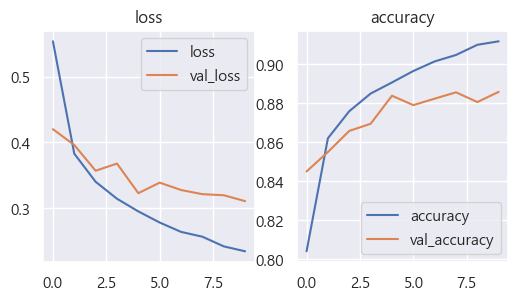

In [19]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_hisroty.history['loss']    , label='loss')
ax1.plot(fit_hisroty.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_hisroty.history['accuracy']    , label='accuracy')
ax2.plot(fit_hisroty.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()

# 예측

## 예측

In [20]:
proba = model.predict(X_test_scaler)
proba[:3]

313/313 [==============================] - 1s 1ms/step


array([[9.4042671e-06, 2.8719085e-06, 1.2735890e-04, 6.8819732e-05,
        3.5693978e-05, 5.9877893e-05, 1.8418843e-05, 2.2559213e-03,
        2.2514025e-06, 9.9741936e-01],
       [1.3548294e-05, 1.8006149e-12, 9.9917209e-01, 4.2091702e-10,
        7.2885677e-04, 2.0760569e-11, 8.5466971e-05, 1.0075823e-13,
        1.3009386e-11, 6.4150020e-13],
       [6.1683707e-08, 9.9999988e-01, 9.2735508e-09, 2.6917000e-08,
        7.1562878e-10, 3.2253172e-16, 7.0327633e-09, 7.7552006e-13,
        5.8213647e-09, 1.9575034e-13]], dtype=float32)

In [21]:
pred   = np.argmax(proba, axis=1)
y_test = np.argmax(y_test_oh, axis=1)
print(pred[:3], y_test[:3])

[9 2 1] [9 2 1]


## 오답 검증
* sklearn.metrics.<b>confusion_matrix()</b>
* pandas.<b>crosstab(index, columns, values=None, rownames=None, colnames=None</b>, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)


In [22]:
ans_df = pd.DataFrame( {"y_test": y_test, "pred":pred})
ans_df.head()

,y_test,pred
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6


In [23]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, pred)
print(res)

[[804   1  16  34   2   0 136   0   7   0]
 [  0 974   1  20   2   0   3   0   0   0]
 [ 16   1 871  11  63   0  37   0   1   0]
 [ 13   8  12 912  30   0  21   0   4   0]
 [  0   0 145  38 764   0  49   0   4   0]
 [  0   0   0   1   0 955   0  18   2  24]
 [ 84   1 134  32  59   0 685   0   5   0]
 [  0   0   0   0   0   9   0 921   0  70]
 [  6   1   9   5   2   2   7   4 964   0]
 [  0   0   0   0   0   4   1  17   0 978]]


In [24]:
## 오답 idx
idx_list = ans_df[ ans_df['y_test'] != ans_df['pred']  ].index
len(idx_list)

1172

In [25]:
pd.Series(y_test[idx_list]).value_counts()

6    315
4    236
0    196
2    129
3     88
7     79
5     45
8     36
1     26
9     22
dtype: int64

In [37]:
LABEL_NAME__[6], LABEL_NAME__[4], LABEL_NAME__[0], LABEL_NAME__[2]

('Shirt', 'Coat', 'T-shirt/top', 'Pullover')

* by 형진

In [38]:
xdf = ans_df[ans_df['pred']!= ans_df['y_test']]
xdf = xdf.sort_values(by='y_test')
xdf.head()

,y_test,pred
4658,0,3
1686,0,6
1731,0,6
3938,0,2
3917,0,6


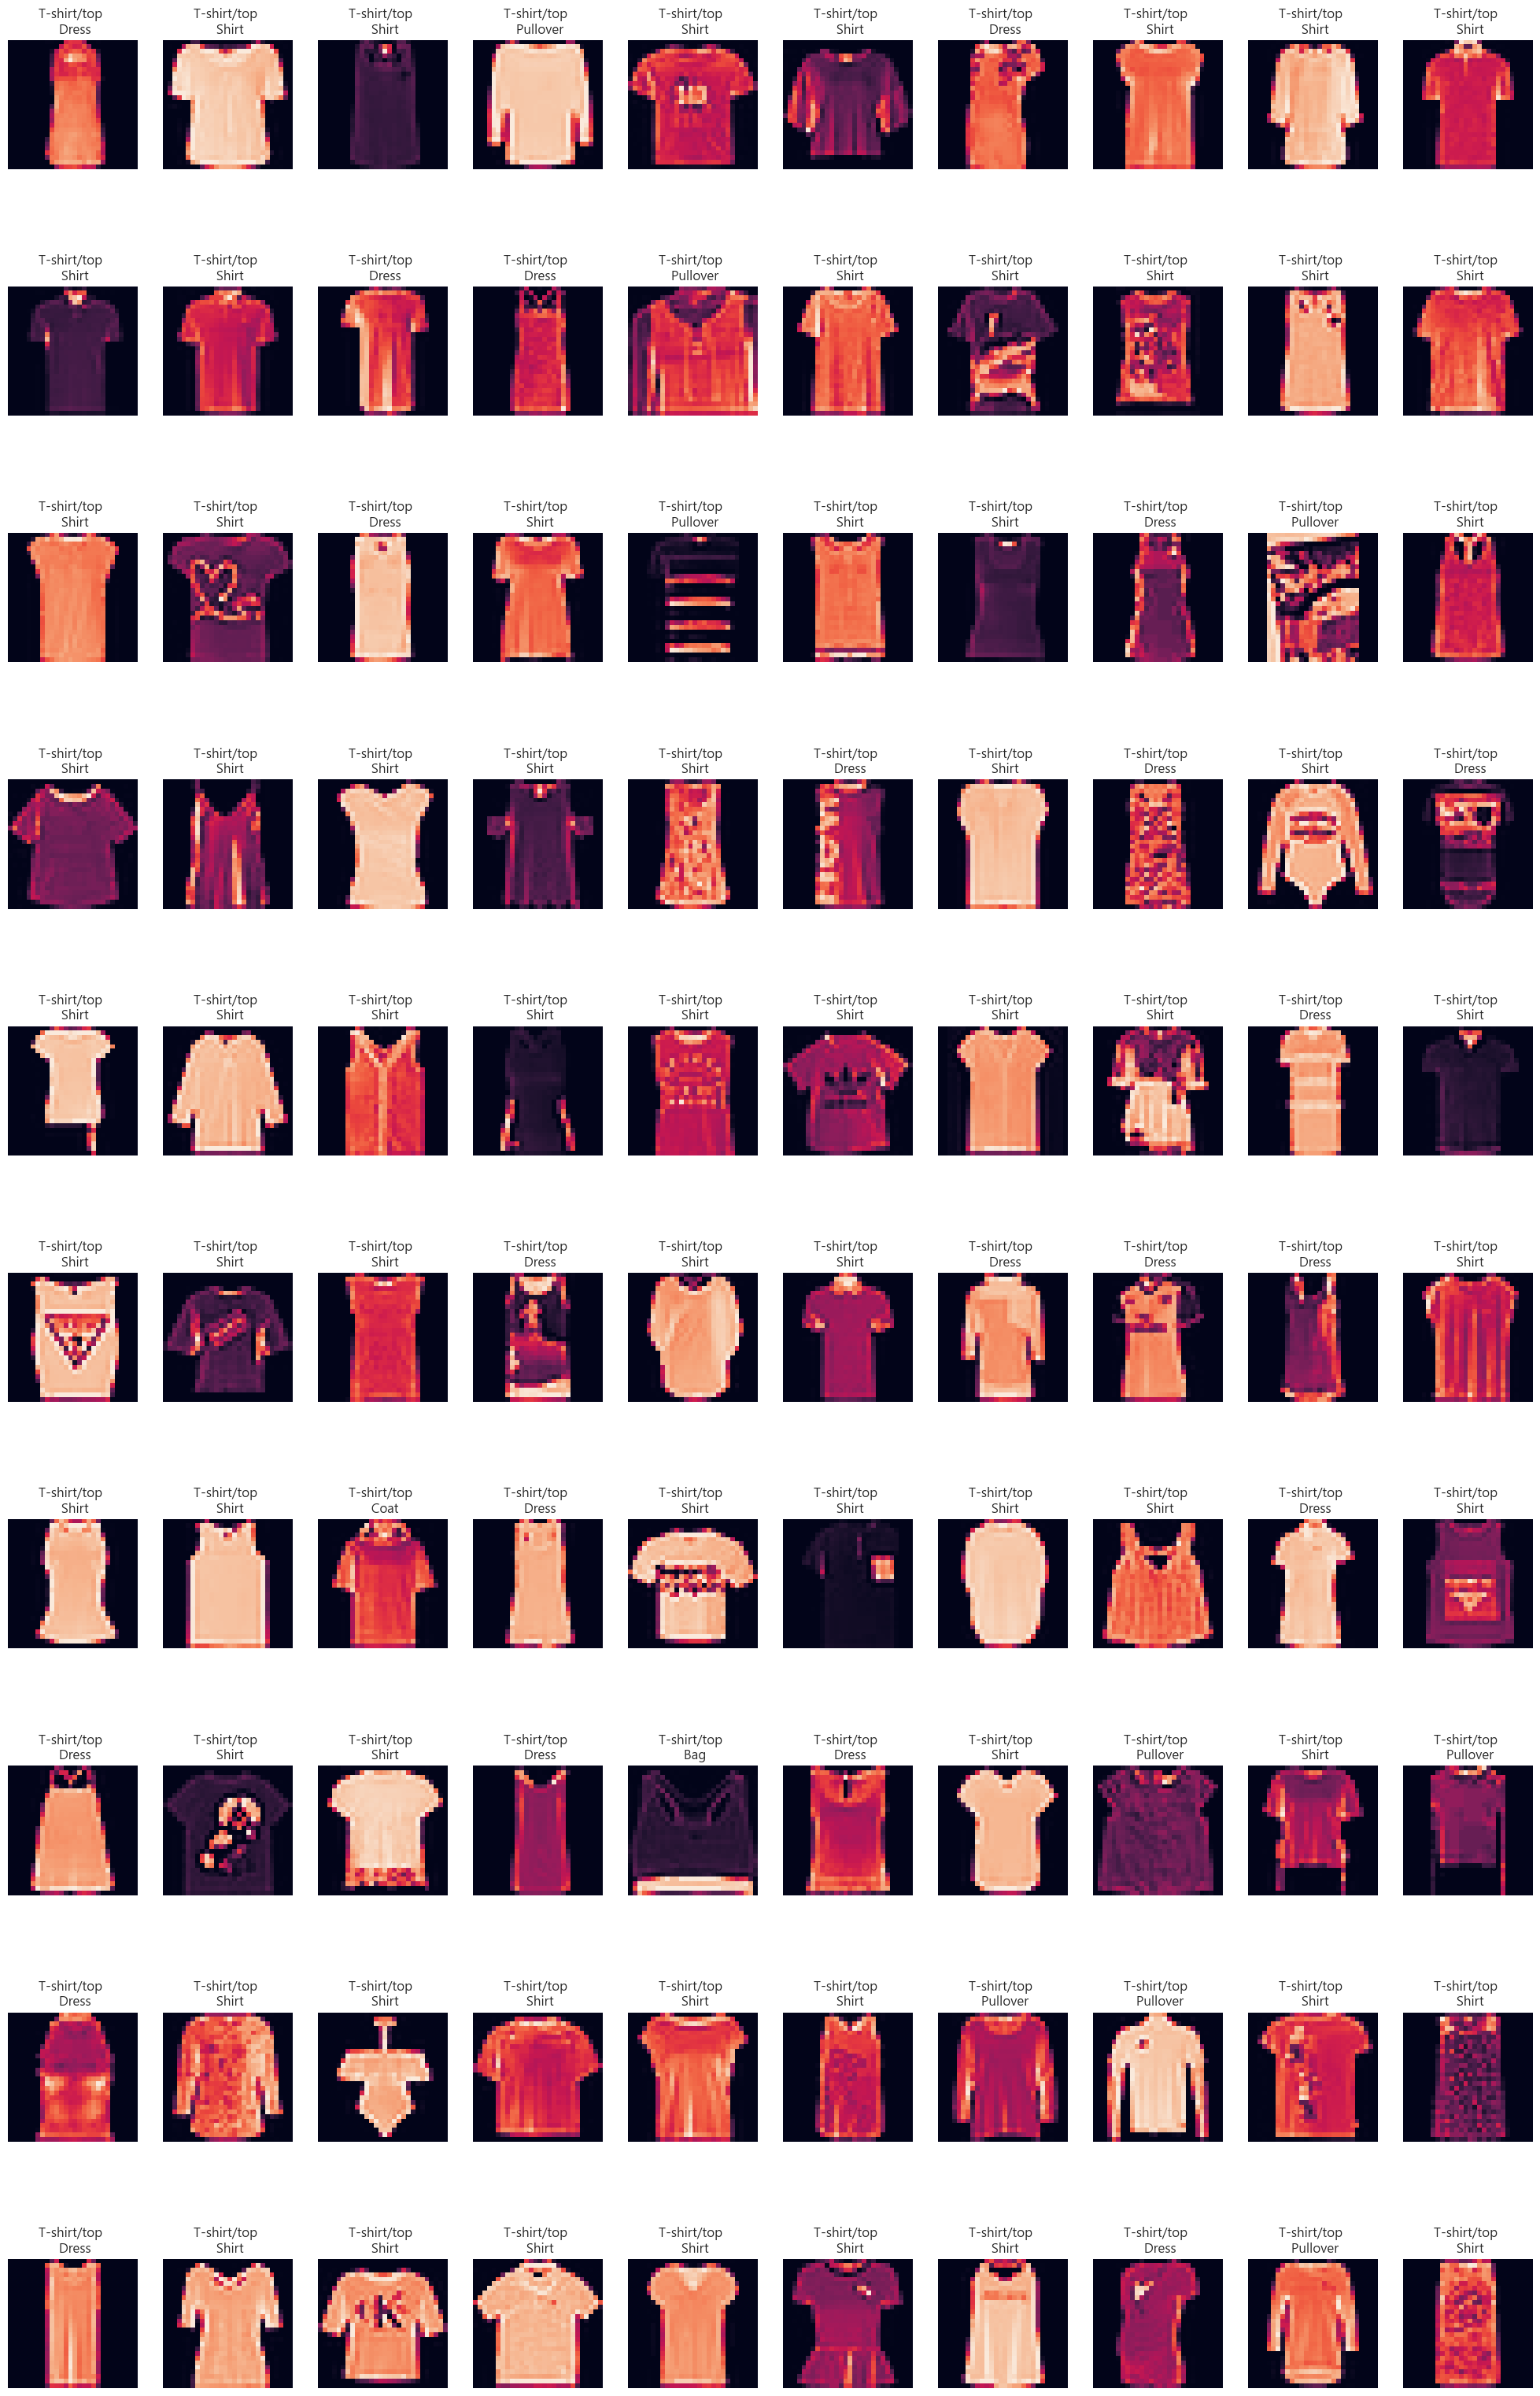

In [27]:
plt.figure(figsize=(25,40))

for i, idx in enumerate(xdf.index[:100]):
    plt.subplot(10,10,i+1)
    # plt.title(f"y:{ xdf.loc[idx, 'y_test']} y^:{xdf.loc[idx, 'pred']}")
    plt.title(f"{ LABEL_NAME__[xdf.loc[idx, 'y_test']]} \n {LABEL_NAME__[xdf.loc[idx, 'pred']]}")
    plt.imshow(X_test[idx].reshape(28,28))
    plt.axis('off')
    plt.grid(False)
    
# plt.tight_layout()    
plt.show()

# 사용자 데이터 예측
* Jupyter Web Widget : https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html

In [28]:
# ! pip install ipywidgets

In [29]:
import ipywidgets as widgets
btn = widgets.FileUpload(
    accept='image/*',    #'.png', 'image/*,.pdf'
    multiple=True
)
display(btn)

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

In [39]:
btn.value

({'name': 'test_sh.png',
  'type': 'image/png',
  'size': 56541,
  'content': <memory at 0x00000294CC3411C0>,
  'last_modified': datetime.datetime(2023, 4, 12, 6, 51, 32, 115000, tzinfo=datetime.timezone.utc)},)

* by 규환

In [40]:
for dic in btn.value:
    display(widgets.Image(value=dic['content'].tobytes()))

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01k\x00\x00\x01\x10\x08\x02\x00\x00\x00\xf9\xc1\xc2…

test_sh.png  56541
(1, 784)
1/1 [==============================] - 0s 23ms/step
7 Sneaker


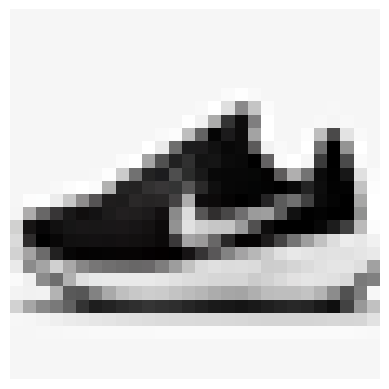

In [41]:
from PIL import Image
import io
for i, dic in enumerate(btn.value):
    plt.subplot(1, len(btn.value)  , i+1)   #1 2 1   1 2 2
    print(f"{dic['name']}  {dic['size']}")
    
    # ------------------------------------------------
    # addr   = dic['content']
    # io_obj = io.BytesIO(addr)   # io.BytesIO(  dic['content']  )
    # bbyte  = addr.tobytes()     # dic['content'].tobytes()
    # print(addr, io_obj, bbyte)
    # display(    widgets.Image(value=dic['content'].tobytes())    )
    # ------------------------------------------------
    
    img = Image.open(io.BytesIO(dic['content'])).resize((28, 28)) 
    plt.axis('off')
    plt.grid(False)
    plt.imshow(img)

    # ---- train     : (60000 , 28, 28)    
    # ---- input_dim : (1, 784)
    #print(np.array(img).shape)       #  (28,28,3)
    
    img = np.array(img)[:, :, 1]
    #print( img.shape )               #  (28,28)   차원축소(컬러맵불필요)
    
    
    #img[np.newaxis, ... ]            # (1, 28,28) 사진1장  
    #np.expand_dims(img,0)
    img = (np.expand_dims(img,0)).reshape(1,-1) # (1, 784) (사진1장,픽셀1D)
    print(img.shape) 
    
    # img_scaler = img/255.0
    img_scaler = (255 - img) / 255.0           #----- 흑백반전 : by 규환
    
    proba = model.predict(img_scaler)
    pred = np.argmax(proba)
    print(pred,  LABEL_NAME__[pred])

# [실습] fashion_mnist

In [33]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

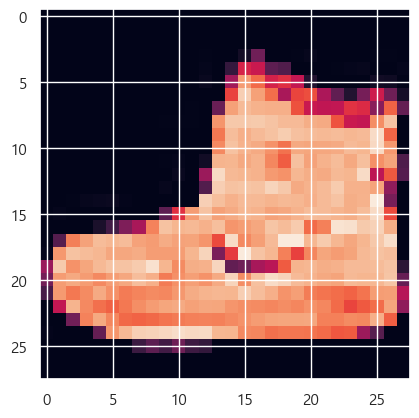

In [34]:
plt.imshow(train_images[0])
plt.show()